Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Decision trees: Problem solving

We previously looked at predicting whether or not  a candy is popular based on its other properties using logistic regression.

This gave us an idea of how  different properties **add** together to make a candy popular, but it didn't give us as much of an idea of how the properties act on each other.

In this session, you will predict whether or not is popular using decision trees.

This dataset [was collected](http://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) to discover the most popular Halloween candy.

| Variable         | Type              | Description                                                  |
|:-----------------|:------------------|:--------------------------------------------------------------|
| chocolate        | Numeric (binary)  | Does it contain chocolate?                                   |
| fruity           | Numeric (binary)  | Is it fruit flavored?                                        |
| caramel          | Numeric (binary)  | Is there caramel in the candy?                               |
| peanutalmondy    | Numeric (binary)  | Does it contain peanuts, peanut butter or almonds?           |
| nougat           | Numeric (binary)  | Does it contain nougat?                                      |
| crispedricewafer | Numeric (binary)  | Does it contain crisped rice, wafers, or a cookie component? |
| hard             | Numeric (binary)  | Is it a hard candy?                                          |
| bar              | Numeric (binary)  | Is it a candy bar?                                           |
| pluribus         | Numeric (binary)  | Is it one of many candies in a bag or box?                   |
| sugarpercent     | Numeric (0 to 1)  | The percentile of sugar it falls under within the data set.  |
| pricepercent     | Numeric (0 to 1)  | The unit price percentile compared to the rest of the set.   |
| winpercent       | Numeric (percent) | The overall win percentage according to 269,000 matchups     |
| popular | Numeric (binary) | 1 if win percentage is over 50% and 0 otherwise |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset is Copyright (c) 2014 ESPN Internet Ventures and distributed under an MIT license.
</div>


## Load the data


Start by loading `readr`, `dplyr`, and `tibble`.

In [1]:
library(readr)
library(dplyr)
library(tibble)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="_:K|OW8bxsgYaKGyO,SL">tibble</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><next><block type="import_R" id="X=_R*qQj+UIHe#56hjCm"><field name="libraryName" id="_:K|OW8bxsgYaKGyO,SL">tibble</field></block></next></block></next></block></xml>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Load a dataframe with `"datasets/candy-data.csv"` but use `index_col="competitorname"` to make `competitorname` an ID instead of a variable.
Then display the dataframe.

*Hint: `tibble::column_to_rownames`*

In [8]:
dataframe = readr::read_csv("datasets/candy-data.csv") %>%
    tibble::column_to_rownames(var = "competitorname")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="_:K|OW8bxsgYaKGyO,SL">tibble</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="2" y="176"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="3).iDp;Sc.=6x!n-s^1h"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="1"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/candy-data.csv</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id=")#=zq./j*ftf0:lgs+eU"><mutation items="1"></mutation><field name="VAR" id="_:K|OW8bxsgYaKGyO,SL">tibble</field><field name="MEMBER">column_to_rownames</field><data>tibble:column_to_rownames</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="RK_|@dw61NgV;,E={Ps5"><field name="CODE">var = "competitorname"</field></block></value></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rows: 85 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): competitorname
dbl (13): chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewaf...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.97173,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.60294,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.26109,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.11650,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.34146,1
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.34755,1
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.91455,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313,0.255,47.17323,0


## Explore the data

Since this is a dataset you've looked at before, just make a correlation heatmap to show how the variables are related to each other.

Load `base`, `ggplot2`, `psych`, and `corrr`.

In [3]:
library(corrr)
library(base)
library(ggplot2)
library(psych)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable></variables><block type="import_R" id="fvM{-l%xz0![2.n:2Hoj" x="-86" y="-4"><field name="libraryName" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><next><block type="import_R" id="*VxvMC/-.UEwASPz(/;T"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="P-VMU%%i=n!?0`h3v|jE"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




And create and show the heatmap figure in one cell.

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


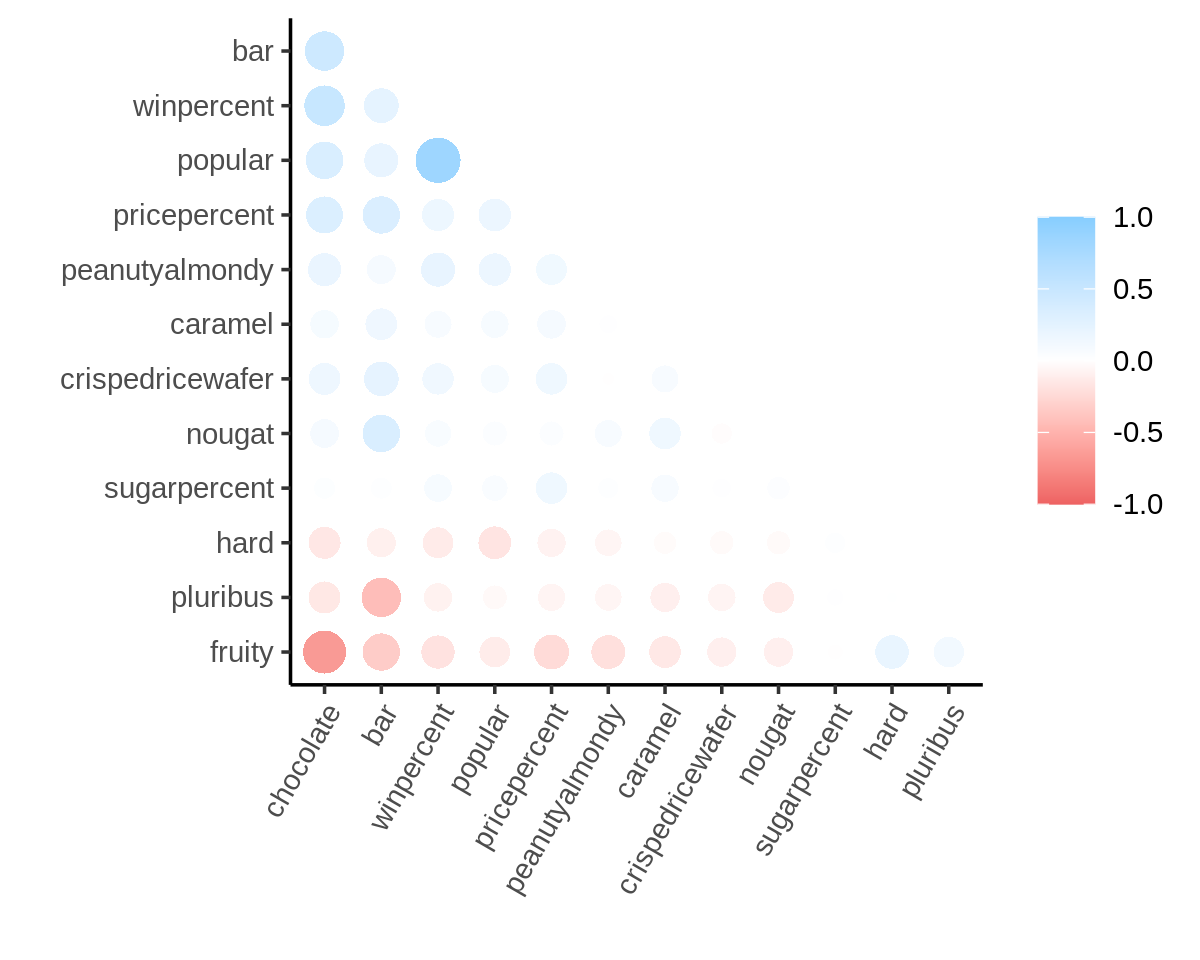

In [4]:
dataframe %>%
    corrr::correlate() %>%
    corrr::rearrange() %>%
    corrr::shave() %>%
    corrr::rplot() +
    ggplot2::theme(axis.text.x = element_text(angle = 60, hjust = 1))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable></variables><block type="pipe_R" id="jI{JJE%`Lri!8Z9tiY6Y" x="-15" y="-208"><mutation items="4"></mutation><value name="INPUT"><block type="variables_get" id="I5h^kej12y)=;QW;mwpQ"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="X`BT+QjtTSSmCR99;MKl"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">correlate</field><data>corrr:correlate</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="|M8DM]xCy`6T0bV1?R1K"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rearrange</field><data>corrr:rearrange</data></block></value><value name="ADD2"><block type="varDoMethod_R" id="cu-?GG]G.HrY?/GyE~nE"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">shave</field><data>corrr:shave</data></block></value><value name="ADD3"><block type="ggplot_plus_R" id="k2h*{8dg+lu;K@5k[=HC"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="j=a0p{j[O4)zBg1}J3K8"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rplot</field><data>corrr:rplot</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="qnmQwX4y`q2-vqp]iTC8"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">theme</field><data>ggplot2:theme</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="oaHzpO1FS)+#I~E`-6Q?"><field name="CODE">axis.text.x = element_text(angle = 60, hjust = 1)</field></block></value></block></value></block></value></block></xml>

----------------------------
**QUESTION:**

Look at the first two columns.
What variables do these correspond to?

**ANSWER: (click here to edit)**

*Chocolate and bar*

----------------------------

**QUESTION:**

How would you describe their pattern of correlation with other variables?

**ANSWER: (click here to edit)**

*They appear to correlate with other variables in somewhat opposite ways: where one is strong, the other is weaker*

----------------------------

## Prepare train/test sets

You need to split the dataframe into training data and testing data, but first you need to convert `popular` into a factor for prediction, and you need to drop `winpercent`, which is a parallel feature to `popular`.

Start by loading `rsample`.

In [5]:
library(rsample)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable></variables><block type="import_R" id="g^doBJYp/fk!)^uuYnUf" x="-280" y="10"><field name="libraryName" id="~~-I(f=60)#JfKGvV_AP">rsample</field></block></xml>

Warning message:
“package ‘rsample’ was built under R version 4.2.2”


Now update the dataframe as described above and do the splits.
Use `set.seed(2)` so we get the same answer

In [9]:
base::set.seed(2)

dataframe = dataframe %>%
    dplyr::mutate(popular=factor(popular)) %>%
    dplyr::select(-winpercent)

data_split = rsample::initial_split(dataframe,prop=.80)
data_train = rsample::training(data_split)
data_test = rsample::testing(data_split)

data_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="bQ!4E:J!~]0(]7KV]m@=">data_split</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="varDoMethod_R" id="OV5VE|Pm,wMdVy:BFuI." x="-134" y="-13"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">set.seed</field><data>base:set.seed</data><value name="ADD0"><block type="math_number" id="~QLc9NTcH{U|:POw{}9s"><field name="NUM">2</field></block></value></block><block type="variables_set" id="pqe,bA|(visJQd48=Wf~" x="-137" y="113"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="KA=hLd3r{UKxA_qN8jzu"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="qw7eF};{$f3x1Rr0U6gS"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="-00s4E.d(nD9%clg}Wi%"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="GBV01=On`usB9nUSdhBA"><field name="CODE">popular=factor(popular)</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="U8`U;f4R0(Iy^y6!qN~f"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id=",BDvude42=?=@A4H*0y?"><field name="CODE">-winpercent</field></block></value></block></value></block></value></block><block type="variables_set" id="s!g),aa^(]dox/f`@P!y" x="-116" y="313"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field><value name="VALUE"><block type="varDoMethod_R" id="hPsr6}9C/VNgaLsKuR,o"><mutation items="2"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">initial_split</field><data>rsample:initial_split</data><value name="ADD0"><block type="variables_get" id="]~#@ltf];dTom_%pzV4n"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R`?vH79hsA6Duxa9)AFX"><field name="CODE">prop=.80</field></block></value></block></value><next><block type="variables_set" id="3J6#JDFV0wE?V;NuM=?L"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field><value name="VALUE"><block type="varDoMethod_R" id="X|Q7lj,pD_9W{%^.xd7h"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">training</field><data>rsample:training</data><value name="ADD0"><block type="variables_get" id="JFCmHyJPiN`qwnlE~:iT"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value><next><block type="variables_set" id="Y]ag(g~}tkN6:_X*]6P{"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field><value name="VALUE"><block type="varDoMethod_R" id="WBYo8G|ZcojJAqETRnv`"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">testing</field><data>rsample:testing</data><value name="ADD0"><block type="variables_get" id="p^~x9|Zj((6qaUVvj#.E"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="9j){6[r67+7OFx`a~K[Y" x="-115" y="515"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></xml>

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,popular
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,0
Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313,0.255,0
Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,0
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,1
Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.267,0.279,1
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,0
Fun Dip,0,1,0,0,0,0,1,0,0,0.732,0.325,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,1


## Decision tree model

Load the packages for creating the decision tree model and graphing it.

In [10]:
library(parsnip)
library(generics)
library(hardhat)
library(rpart.plot)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="h8j-D~HE*;.==#-~]vZ;">hardhat</variable></variables><block type="import_R" id="Tkh?^4ccrGs0mL!EM3hu" x="-101" y="-34"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id=".Hs/97T-2cD7?pjtke5p"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><next><block type="import_R" id="vSa}^i?pnLvk~Ax!d/Go"><field name="libraryName" id="h8j-D~HE*;.==#-~]vZ;">hardhat</field><next><block type="dummyNoOutputCodeBlock_R" id="p_zwR?3*i|^~B`|k~tx+"><field name="CODE">library(rpart.plot)</field></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘parsnip’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Loading required package: rpart


Attaching package: ‘rpart’


The following object is masked from ‘package:generics’:

    prune




Now create the decision tree model and fit it.

In [11]:
model = parsnip::decision_tree() %>%
    parsnip::set_mode("classification") %>%
    parsnip::set_engine("rpart") %>%
    parsnip::fit.model_spec(popular ~ .,data = data_train)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable></variables><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l" x="-94" y="176"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="3"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">decision_tree</field><data>parsnip:decision_tree</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">classification</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">rpart</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="Q61XWF.0ty]Aw^i83YUS"><mutation items="2"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">fit.model_spec</field><data>parsnip:fit.model_spec</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">popular ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value></block></value></block></xml>

----------------------------
**QUESTION:**

Why don't we need to scale anything?

**ANSWER: (click here to edit)**

*Scaling doesn't matter for decision trees like it does for regression.
In regression, each feature's contributions are added to the others, so people like to scale to make the coefficients for each feature more directly comparable.
There is no equivalent concept in decision trees; in fact, it is probably more confusing to scale variables in decision trees.*

----------------------------

Get predictions on the test data.

In [12]:
data_evaluation = generics::augment(model,data_test)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="qHR/^ulVJ-n)W4{:7-@Y" x="-193" y="204"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="k:ygkKz,swERp]34_uH{"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="9A!7aBLNe1]IufZ-R;BY"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value><value name="ADD1"><block type="variables_get" id="qPW(v;lbSJ=RJ)y;hW$)"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block><block type="variables_get" id="Um|1+kaS%|p}e=,Pw)MQ" x="-203" y="317"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></xml>

chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,popular,.pred_class,.pred_0,.pred_1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
0,1,0,0,0,0,0,0,0,0.906,0.511,1,0,0.8055556,0.1944444
1,0,0,0,1,0,0,1,0,0.604,0.511,0,0,0.5714286,0.4285714
0,1,0,0,0,0,0,0,1,0.732,0.511,0,0,0.8055556,0.1944444
0,1,0,0,0,0,0,0,1,0.465,0.465,0,0,0.8055556,0.1944444
1,0,0,0,0,0,0,1,0,0.430,0.918,1,0,0.5714286,0.4285714
1,0,0,0,0,0,0,1,0,0.430,0.918,1,0,0.5714286,0.4285714
0,1,0,0,0,0,1,0,1,0.093,0.511,0,0,0.8055556,0.1944444
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,0,0,1,0,0,0,0,0,0.720,0.651,1,1,0.0000000,1.0000000


## Evaluate model performance

Load the evaluation metrics package.

In [13]:
library(yardstick)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable></variables><block type="import_R" id="~]m5/PaJhO^)r2YX)!Ko" x="-152" y="-34"><field name="libraryName" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field></block></xml>

For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


Attaching package: ‘yardstick’


The following object is masked from ‘package:generics’:

    accuracy


The following object is masked from ‘package:readr’:

    spec




Get the accuracy, recall, precision, and F1.

In [16]:
list(yardstick::accuracy(data_evaluation,truth=popular,estimate=.pred_class), yardstick::precision(data_evaluation,truth=popular,estimate=.pred_class), yardstick::recall(data_evaluation,truth=popular,estimate=.pred_class), yardstick::f_meas(data_evaluation,truth=popular,estimate=.pred_class)) %>%
    dplyr::bind_rows()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="pipe_R" id="4`_*5SvnS~Sa.p=3S#OI" x="-179" y="-223"><mutation items="1"></mutation><value name="INPUT"><block type="lists_create_with" id="|A+]|U,HA2TI/$inZo$N"><mutation items="4"></mutation><value name="ADD0"><block type="varDoMethod_R" id="ovJDL$T;GrTBZ,)jMz;a"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">accuracy</field><data>yardstick:accuracy</data><value name="ADD0"><block type="variables_get" id="$#GYCvI1LKXt%Rsb09a}"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="i#@XFD{vr]B47yD52|(B"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="(x50a~#{oijRotT|Z?8G"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="j8eqada{+]K+(kP]fjd["><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">precision</field><data>yardstick:precision</data><value name="ADD0"><block type="variables_get" id="UEG_cZtZh0$Qd^M!JdR3"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|Z)xC?L]O4:;pY-Yx}[`"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="/-*t{(I-ds+mDl%{qy}v"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="9kYm6fYJ_jy~n1FTvM}*"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">recall</field><data>yardstick:recall</data><value name="ADD0"><block type="variables_get" id="1^]4G]IyxmvdiCk.z~.8"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lpEx2Z_OPFriJq*Isu@T"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="`x3kIKM$)S]L}UQK]4_="><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD3"><block type="varDoMethod_R" id="z+8zgbt?lcLVd=Cbu%Nb"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">f_meas</field><data>yardstick:f_meas</data><value name="ADD0"><block type="variables_get" id="pm6N!wHXIHecf{K#Rb~R"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="q7?QHt~wfoU#+CTI{t;y"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="DF8?X;fK)K)(`.eX-,4S"><field name="CODE">estimate=.pred_class</field></block></value></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="Ivg[L*te{4kkI16K6!!~"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">bind_rows</field><data>dplyr:bind_rows</data></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5882353
precision,binary,0.5625000
recall,binary,1.0000000
f_meas,binary,0.7200000


Do it again for the target class, `1`.

In [17]:
list(yardstick::accuracy(data_evaluation,truth=popular,estimate=.pred_class,event_level="second"), yardstick::precision(data_evaluation,truth=popular,estimate=.pred_class,event_level="second"), yardstick::recall(data_evaluation,truth=popular,estimate=.pred_class,event_level="second"), yardstick::f_meas(data_evaluation,truth=popular,estimate=.pred_class,event_level="second")) %>%
    dplyr::bind_rows()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="pipe_R" id="4`_*5SvnS~Sa.p=3S#OI" x="-179" y="-223"><mutation items="1"></mutation><value name="INPUT"><block type="lists_create_with" id="|A+]|U,HA2TI/$inZo$N"><mutation items="4"></mutation><value name="ADD0"><block type="varDoMethod_R" id="ovJDL$T;GrTBZ,)jMz;a"><mutation items="4"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">accuracy</field><data>yardstick:accuracy</data><value name="ADD0"><block type="variables_get" id="$#GYCvI1LKXt%Rsb09a}"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="i#@XFD{vr]B47yD52|(B"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="(x50a~#{oijRotT|Z?8G"><field name="CODE">estimate=.pred_class</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="J)M[q_I1_1xDQ8G|G?TL"><field name="CODE">event_level="second"</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="j8eqada{+]K+(kP]fjd["><mutation items="4"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">precision</field><data>yardstick:precision</data><value name="ADD0"><block type="variables_get" id="UEG_cZtZh0$Qd^M!JdR3"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|Z)xC?L]O4:;pY-Yx}[`"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="/-*t{(I-ds+mDl%{qy}v"><field name="CODE">estimate=.pred_class</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="iFhN%71!A{wev;*O;Bue"><field name="CODE">event_level="second"</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="9kYm6fYJ_jy~n1FTvM}*"><mutation items="4"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">recall</field><data>yardstick:recall</data><value name="ADD0"><block type="variables_get" id="1^]4G]IyxmvdiCk.z~.8"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lpEx2Z_OPFriJq*Isu@T"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="`x3kIKM$)S]L}UQK]4_="><field name="CODE">estimate=.pred_class</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="4WN|_|wM!~2PgP:hrc@!"><field name="CODE">event_level="second"</field></block></value></block></value><value name="ADD3"><block type="varDoMethod_R" id="L%yE[JkwL`ytKK60-_T."><mutation items="4"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">f_meas</field><data>yardstick:f_meas</data><value name="ADD0"><block type="variables_get" id="`BLa!o4tbF0Jpv8E@o8S"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="zwer*jeAuJ-Er~aM(|K+"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="nnhQQoIFQI@.VLn]fC$c"><field name="CODE">estimate=.pred_class</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="HmcXI/{S=h-`QW`?7S]R"><field name="CODE">event_level="second"</field></block></value></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="Ivg[L*te{4kkI16K6!!~"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">bind_rows</field><data>dplyr:bind_rows</data></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5882353
precision,binary,1.0000000
recall,binary,0.1250000
f_meas,binary,0.2222222


As we can see, the f1 on the target class is not very good.
Between the two classes, we see perfect scores on precision and recall, but the opposing score is much lower.

## Display the Tree

Plot the tree. For a better display, you should set the plot width/height to 7.

Warning message:
“Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


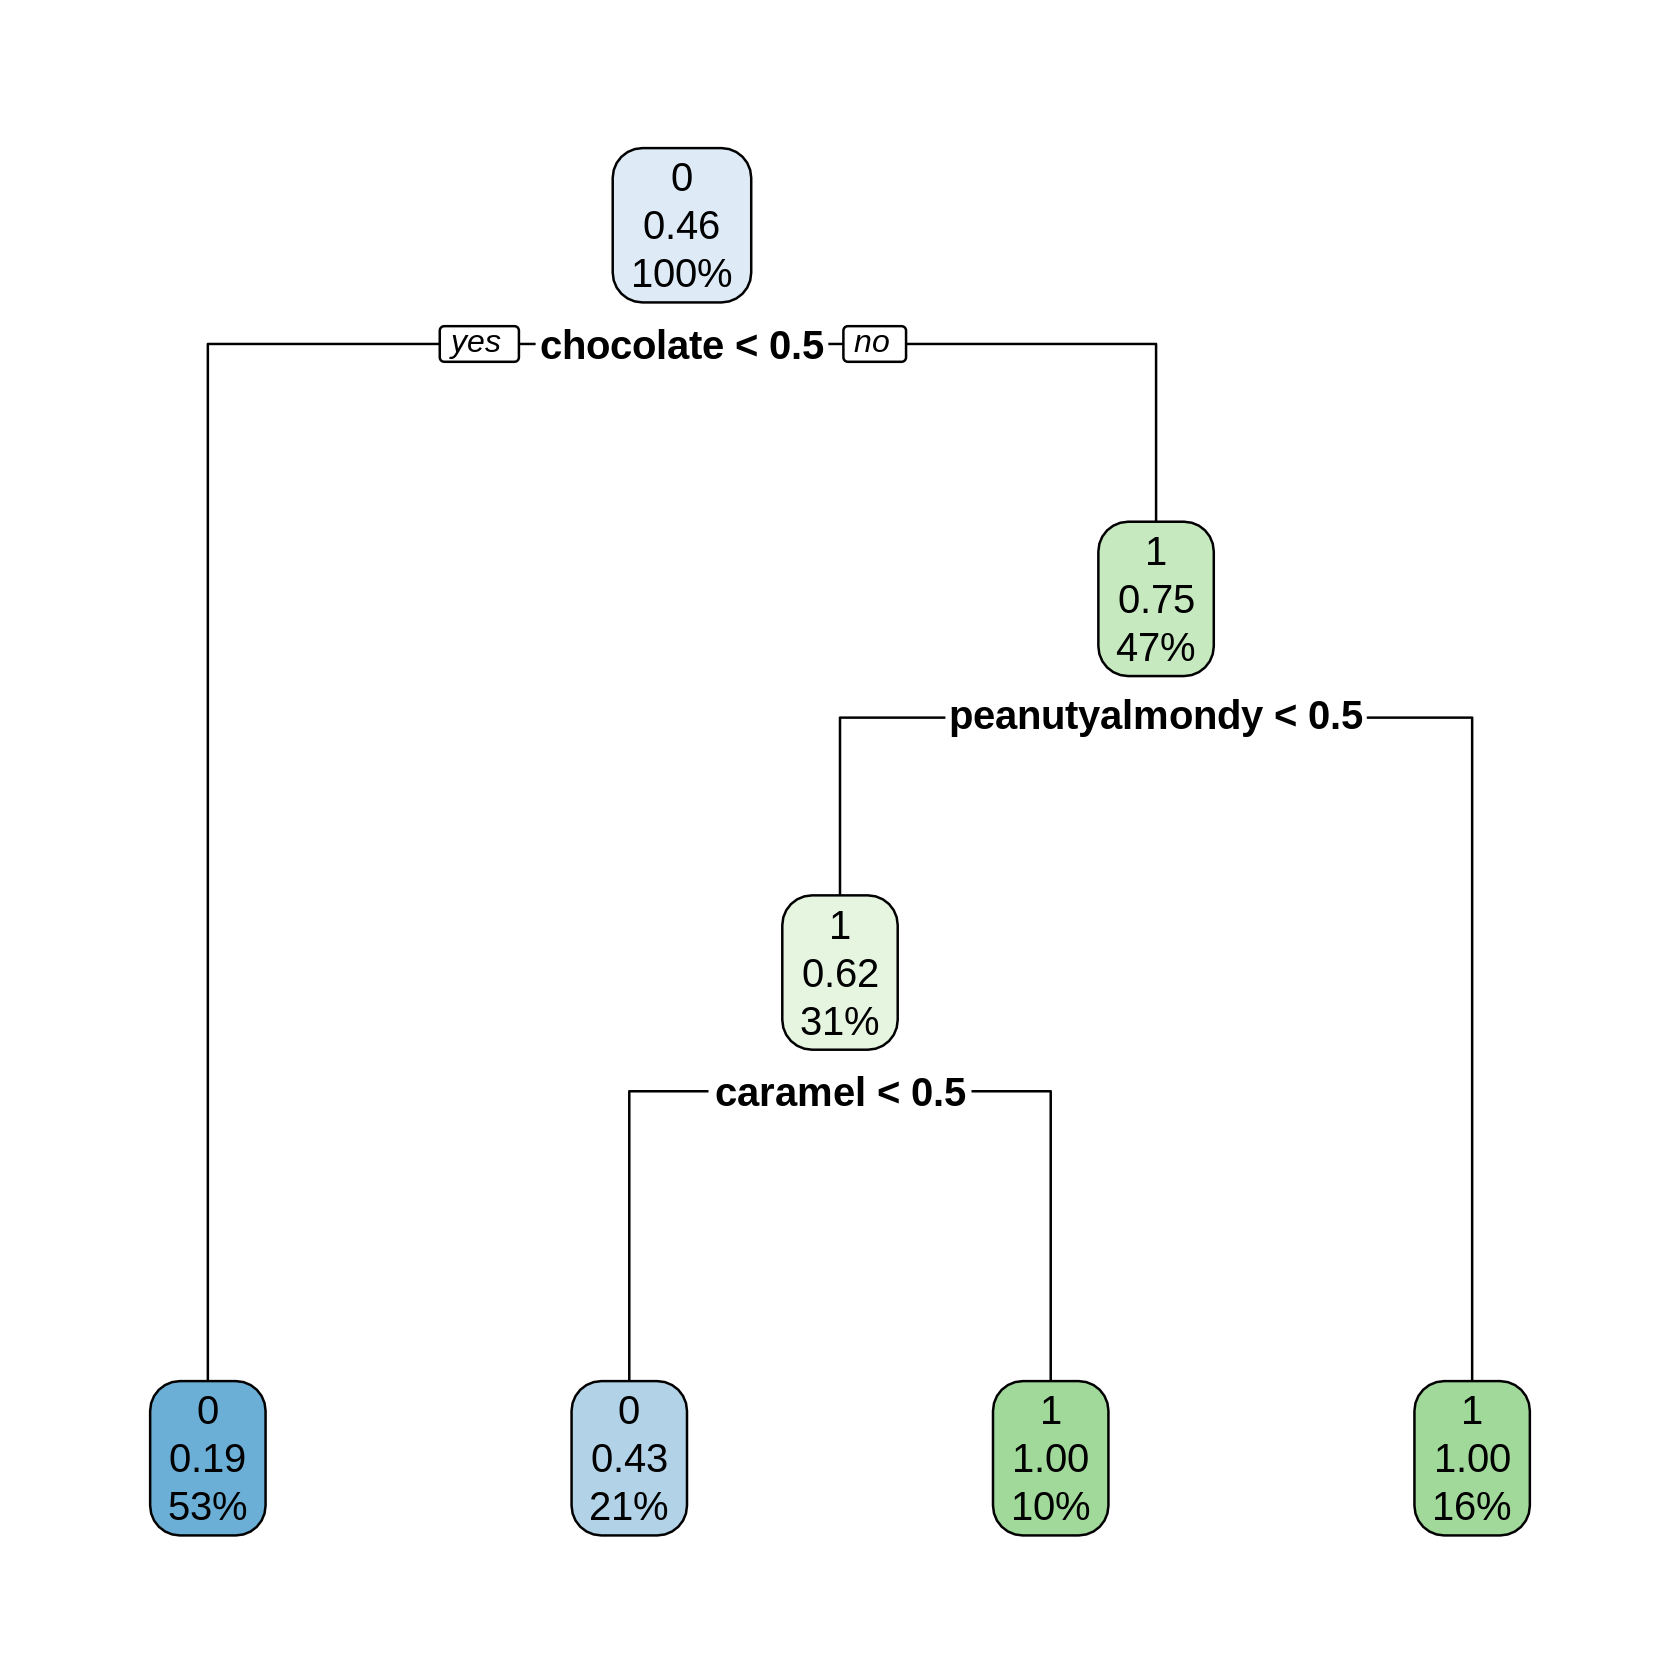

In [19]:
base::options(repr.plot.height = 7)

base::options(repr.plot.width = 7)

model %>%
    hardhat::extract_fit_engine() %>%
    rpart.plot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="h8j-D~HE*;.==#-~]vZ;">hardhat</variable></variables><block type="varDoMethod_R" id="}.WthdelLid3=^Mh~fei" x="-107" y="-105"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">options</field><data>base:options</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="ltUV*n7L#`gq,^?vw1.?"><field name="CODE">repr.plot.height = 7</field></block></value></block><block type="varDoMethod_R" id="ZLh=39hF++^Q08td$4[V" x="-105" y="-31"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">options</field><data>base:options</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="R.bL`*L(V({{xk9q|yt~"><field name="CODE">repr.plot.width = 7</field></block></value></block><block type="pipe_R" id="EcOpNedqA*:KyxQQO`aD" x="-99" y="166"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="oxulaY$UQLs%eB_NV8K$"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="8,LrMM61Vjp(I]N@9ZTT"><mutation items="1"></mutation><field name="VAR" id="h8j-D~HE*;.==#-~]vZ;">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="=ulB)u,D1uA$1.CM;$I@"><field name="CODE">rpart.plot()</field></block></value></block></xml>

--------------

**QUESTION:**

Explain the tree - what are the first three important decisions it makes?

**ANSWER: (click here to edit)**

*It first looks at whether something is chocolate.
If it isn't, the model doesn't consider any other features and predicts not popular. If chocolate is present, the model next considers peanuty/almondy and then caramel. Anything that is chocolate and has either one of these features is predicted to be popular. This suggests that taste is the only factor consumers look at, i.e. they ignore health and price.*

----------------------------

**QUESTION:**

Consider what the logistic regression model said were important features below. 
How does the decision tree compare?

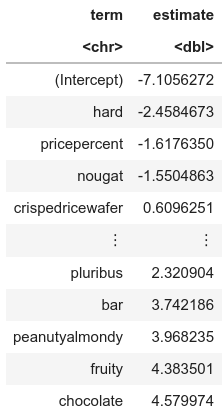

**ANSWER: (click here to edit)**

*They are fairly different.
The decision tree is not giving any importance to fruity and bar which logistic regression counted towards a positive decision, and the decision tree is not giving any importance to the variables that the logistic regression counted towards a negative decision.*

----------------------------

**QUESTION:**

Which model (decision tree or logistic regression) do you think is more correct?
How would you know?

**ANSWER: (click here to edit)**

*Logistic regression because it had a better overall classification. I trust it more because it made more correct predictions.*

----------------------------

<!--  -->